## Assignment: Homework 4
## Name: Kiran Venkata Palla
## Net Id: kvp246

#Assignment 1:
    test if the distribution of ages is the same for 
    
    1) male and femal riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's

my usual imports and setups

In [172]:
%pylab inline
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
import urllib2

# Using the matplotlib customizing file
jsonFile = urllib2.urlopen('https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json')
s = json.load(jsonFile)
plt.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


I am reading in data from January 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. If you are ambitios you can use data from multiple months, thus addressing systematic errors as well

In [31]:
# Reading in July 2015 citibike data
df = pd.read_csv('201506-citibike-tripdata.csv')
print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941219 entries, 0 to 941218
Data columns (total 15 columns):
tripduration               941219 non-null int64
starttime                  941219 non-null object
stoptime                   941219 non-null object
start station id           941219 non-null int64
start station name         941219 non-null object
start station latitude     941219 non-null float64
start station longitude    941219 non-null float64
end station id             941219 non-null int64
end station name           941219 non-null object
end station latitude       941219 non-null float64
end station longitude      941219 non-null float64
bikeid                     941219 non-null int64
usertype                   941219 non-null object
birth year                 810827 non-null float64
gender                     941219 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 114.9+ MB
None


#BY GENDER
splitting data by gender and extracting the age happens in the cell below

In [174]:
# df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

lets splot age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. if i was to do this "for real" the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

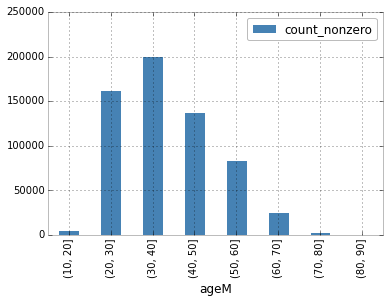

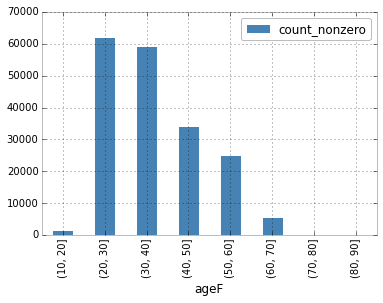

In [175]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 20]       0.000033
(20, 30]       0.067160
(30, 40]       0.058401
(40, 50]       0.018044
(50, 60]       0.015117
(60, 70]       0.002513
(70, 80]       0.000238
(80, 90]       0.000000


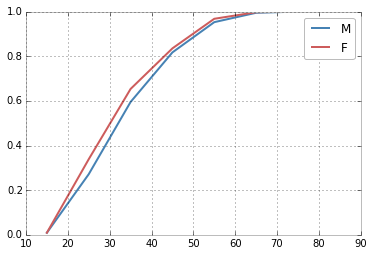

In [176]:
#print df.ageS, df.ageS.cumsum()
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

they look pretty darn similar! that sets my expectation for the tests to come. if i wanted to code the KS test by hand i woud have everything i need: the normalized cumulative distributions can be subtracted from each other and the max distance can be seeked. 

Notice that there amay be Nan values you are gonna have to deal with! you can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [22]:
import scipy.stats

#KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html


In [177]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)
ks

Ks_2sampResult(statistic=0.45996202796586128, pvalue=0.0)

remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1+n2)}{n1n2}}$

where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

but scipy is already giving you the p-value, s you do not have to worry about it i am still giving you the table FWI and if you want to do the coding of the KS test by hand


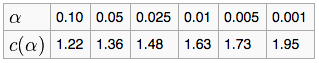

In [53]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="ks2sample_table.png")

In [ ]:
#this cell is for you to tell me what the scipy KS test returned and what it means

_**KS test returned the statistic value of 0.45 and p-value equivalent to 0. This concludes us to reject the NULL hypothesis which infers that both male and female age distributions come from different distributions**_

#Pearson's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [110]:
# Dropping the nan values
ageM = df['ageM'].dropna()
ageF = df['ageF'].dropna()

# Subsetting random sample from male ages to match the sample size of female age values
import random
random.seed(10)
ageMsample = random.sample(ageM, 188655)

# Checking for numbers
print len(ageMsample)
print len(ageF)

#please perform the Pearson's test and tell me what you find
pearson=scipy.stats.pearsonr(ageMsample, ageF)
pearson

188655
188655


(0.0039451843038616598, 0.086608873928261235)

_**Pearson coefficient value seems to be very low around zero which confirms that there is no correlation between the male and female age distributions**_

#Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [111]:
#please perform the Spearman's test and tell me what you find
spearman = scipy.stats.spearmanr(ageMsample, ageF)
spearman

SpearmanrResult(correlation=0.0038923409384807378, pvalue=0.090911039807084704)

_**Similar to Pearson coefficient value, even Spearman seems to return very low around zero which confirms that there is no correlation between the male and female age distributions**_

##please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??

##DO THE SAME FOR THE DISTRIBUTION OF RIDERS DURING THE DAY VS DURING THE NIGHT!

hint: remember how I converted the starttime last time in my own citibikes notebook into units that are easy to read. 
df['mystarttime'] = ...
then you can use something like
df['mystarttime'].dt.hour

In [178]:
# Extracting datetime hour 
df['starttime'] = pd.to_datetime(df['starttime'])
df['starttimehour'] = df['starttime'].dt.hour

In [179]:
# df is the dataframe where the content of the csv file is stored
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['starttimehour'] > 6) & (df['starttimehour'] <= 18)]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['starttimehour'] <= 6) | (df['starttimehour'] > 18)]

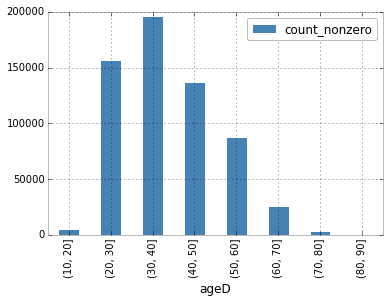

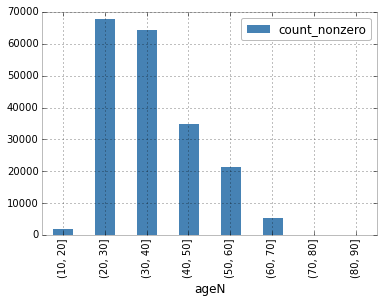

In [180]:
bins = np.arange(10, 99, 10)
df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageD                   
(10, 20]       0.002510
(20, 30]       0.090223
(30, 40]       0.096423
(40, 50]       0.050288
(50, 60]       0.017382
(60, 70]       0.003059
(70, 80]       0.000065
(80, 90]       0.000000


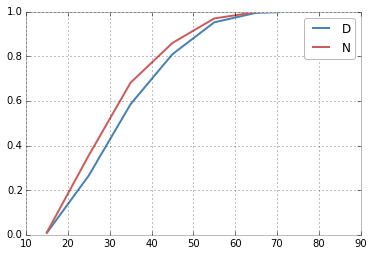

In [181]:
#print df.ageS, df.ageS.cumsum()
csM=df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()

csF=df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "D")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "N")
pl.legend()

_**Above plot showcases variations in the cumulative distributions for day and night riders**_

In [161]:
# KS Test
ks=scipy.stats.ks_2samp(df.ageD, df.ageN)
ks

Ks_2sampResult(statistic=0.44054040558042284, pvalue=0.0)

In [169]:
#print df.ageD.describe()
#print df.ageN.describe()

ageD = df['ageD'].dropna()
ageN = df['ageN'].dropna()

import random
random.seed(10)
ageDsample = random.sample(ageD, len(ageN))

print len(ageDsample)
print len(ageN)

#please perform the Pearson's test and tell me what you find
pearson=scipy.stats.pearsonr(ageDsample, ageN)
pearson

198091
198091


(-0.0016878289584478265, 0.45252939037977202)

In [170]:
# Spearman Test
spearman = scipy.stats.spearmanr(ageDsample, ageN)
spearman

SpearmanrResult(correlation=-0.0023032008993082854, pvalue=0.30532068768760007)

_**KS test output confirms that both the sample distributions are different from each other**_

_**Pearson and Spearman values return zero values which indicate almost no correlation exiting between the day and night riders**_